In [1]:
import numpy as np
import interpolation
import lobatto
import matplotlib.pyplot as plt
import matrix_generator
import system
import element

# Background

## Lagrange interpolation

Langrangian interpolation is used very heavily in Galerkin methods and it is worthwile to go through the theory. Lagrangian interpolation is essentially interpolating a function using an $N$-degree polynomial such that it exactly satisfies the function at $N+1$ points.

### 1D Lagrange interpolation

Let $f(x)$ be the function we wish to interpolate. Let $f^N(X)$ be its order $N$ interpolationg polynomial which perfectly satisfies $f(x)$ on the points $x_0, x_1, x_2, ... x_n$

We define the order $N$ Langrangian at point $x_i$ as
$$L^N_i(x) = \prod_{j=0, j\neq i}^{N} \frac{x-x_j}{x_j-x_i}$$

It can easily be shown that $$L^N_i(x_j) = \delta_{i}$$

The interpolating function can then be written as $$f^N(x) = \sum_{i=0}^{N}L_i^N(x)f(x_i)$$
Note:
* $f^n(x_i) = f(x_i)$
* Order of $L_i^N(x)$ is $N$

In [2]:
def plot_basis(x_interp, x_sample, title, ax):
    y = np.zeros_like(x_interp)
    y[0] = 1
    ax.set_title(title, fontsize=18)
    for i, xi in enumerate(x_interp):
        y_sample = interpolation.compute_matrix(x_interp,x_sample).dot(np.roll(y,i))
        ax.plot(x_sample, y_sample, label=str(xi))

def plot(x_interp, f, x_sample, y_sample, title, ax):
    ax.plot(x_interp, f(x_interp), 'rX', label="Interpolation Nodes")
    ax.plot(x_sample, f(x_sample), 'b', label=r"$f(x) = \sin{(2\pi x)}$")
    ax.plot(x_sample, y_sample, 'r--', label=r"$f^N(x)$")
    ax.set_title(title, fontsize=20)
    ax.legend(fontsize=15); 

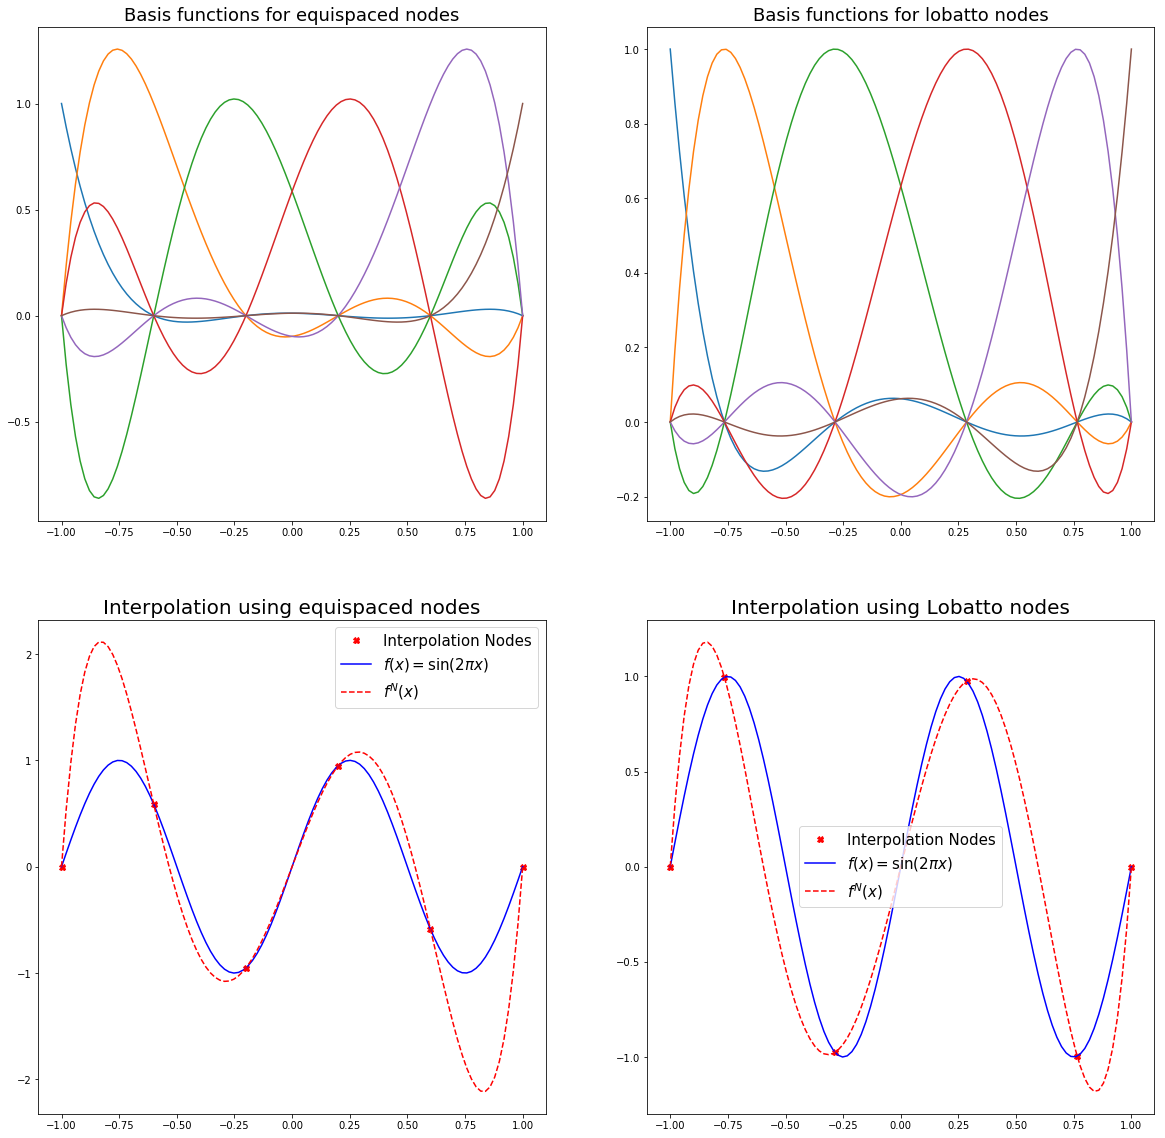

In [3]:
fig, ax = plt.subplots(2,2, figsize=(20,20))

def f(x):
    return np.sin(np.pi*2*x)

# 1D Interpolation using equi-spaced interpolation points
x_interp  = np.linspace(-1,1,6)
fx_interp = f(x_interp)

x_sample  = np.linspace(-1,1,100)
y_sample  = interpolation.compute_matrix(x_interp,x_sample).dot(fx_interp)
plot(x_interp, f, x_sample, y_sample, "Interpolation using equispaced nodes", ax[1][0])
plot_basis(x_interp, x_sample, "Basis functions for equispaced nodes", ax[0][0])


# 1D Interpolation using Lobatto interpolation points
x_interp, weights = lobatto.compute_nodes(6)
fx_interp = f(x_interp)

x_sample  = np.linspace(-1,1,100)
y_sample  = interpolation.compute_matrix(x_interp,x_sample).dot(fx_interp)
plot_basis(x_interp, x_sample, "Basis functions for lobatto nodes", ax[0][1])
plot(x_interp, f, x_sample, y_sample, "Interpolation using Lobatto nodes", ax[1][1])


plt.show()

#### 2D Lagrange interpolation

2D Lagrange interpolation on a rectangular grid is extremely simple.

Let the interpoliating polynomial to the function $f(x,y)$ be $f^{NM}(x,y)$ which satisfies the function of a grid of points formed by $x_0, x_1, ... x_N$ and $y_0, y_1, ... y_M$

$$L_{ij}^{NM}(x,y) = L_i^{N}(x_i) L_j^{M}(y_j)$$
$$f^{MN}(x,y) = \sum_{i=0}^{N} \sum_{j=0}^{M} L_{ij}^{NM}(x,y) f(x_i,y_j)$$

Following are the various basis functions for 4*4 equispaced and lobatto nodes

In [4]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
Nx = Ny = 20
nx = ny = 6

points_x = [np.linspace(-1,1,nx), lobatto.compute_nodes(nx)[0]]
points_y = [np.linspace(-1,1,ny), lobatto.compute_nodes(ny)[0]]

titles = ['equispaced','Lobatto']

X_sample, Y_sample = np.linspace(-1,1,Nx), np.linspace(-1,1,Ny)
x_sample, y_sample = np.meshgrid(X_sample,Y_sample)

for X_interp,Y_interp, title in zip(points_x,points_y, titles):
    
    #fig, axs = plt.subplots(nx,ny, figsize=(20,20), projection='3d')
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Basis function when considering a "+str(nx)+"x"+str(ny)+" grid of "+title+" points", fontsize=22)
    m = interpolation.compute_2Dmatrix(X_interp,Y_interp,X_sample,Y_sample)

    
    x_interp, y_interp = np.meshgrid(X_interp,Y_interp)
    
    for i in xrange(nx):
        for j in xrange(ny):
            f = np.zeros_like(x_interp)
            f[i][j] = 1
            F = m.dot(np.reshape(f,[-1])).reshape([Ny,Nx])
            ax = fig.add_subplot(nx,ny,i*nx+j+1, projection='3d')
            ax.plot_surface(x_sample, y_sample, F, cmap=cm.coolwarm)
            ax.plot(x_interp, y_interp, 'r.')
            ax.set_xticks([]);ax.set_yticks([])

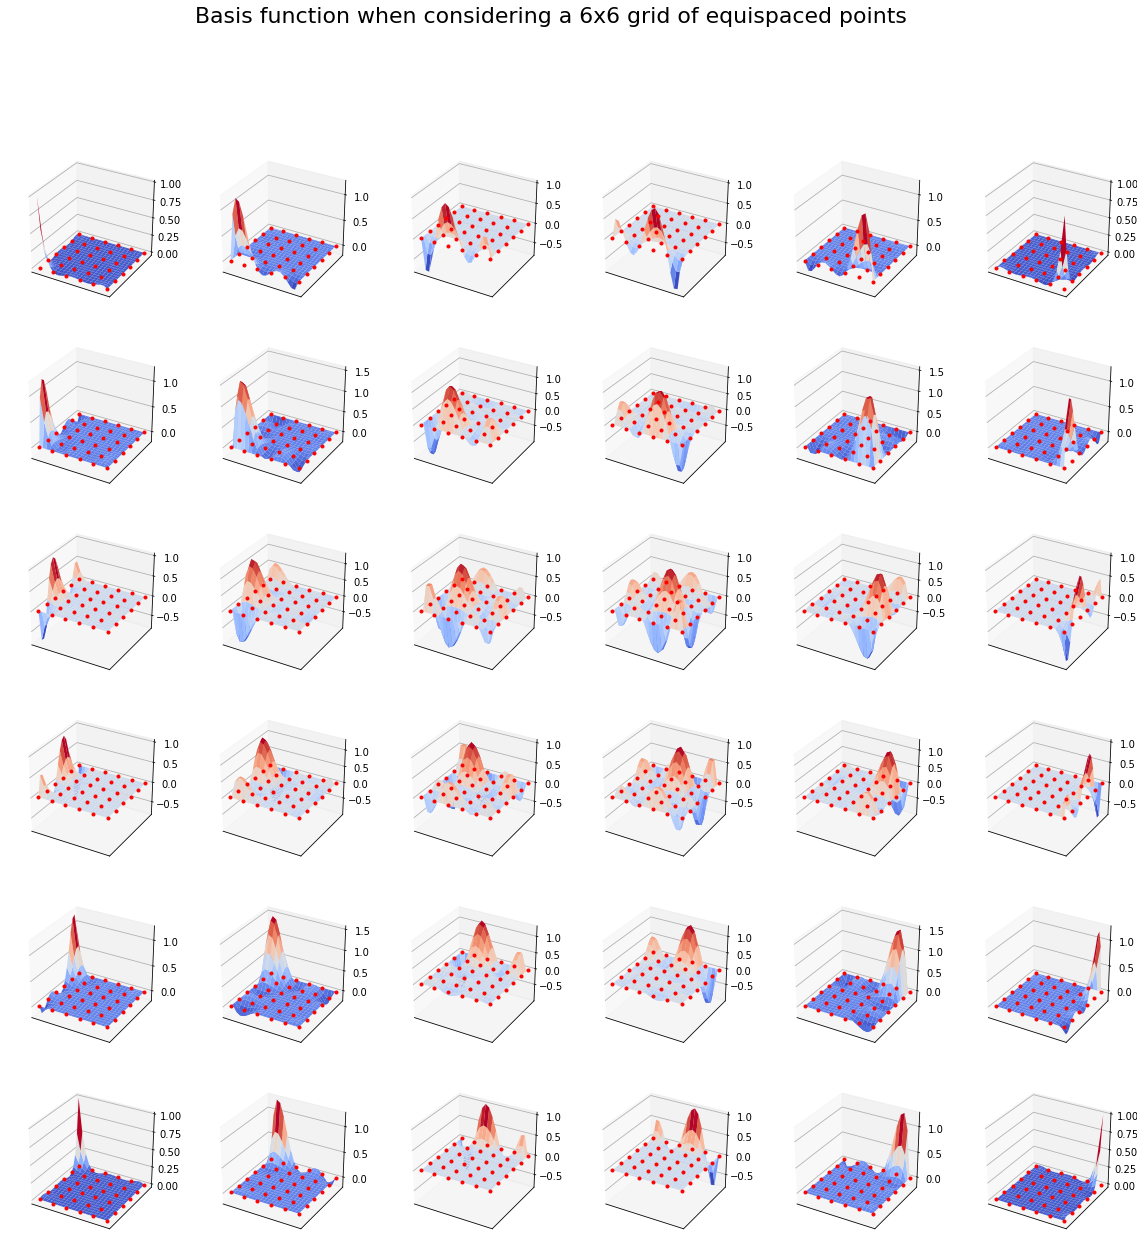

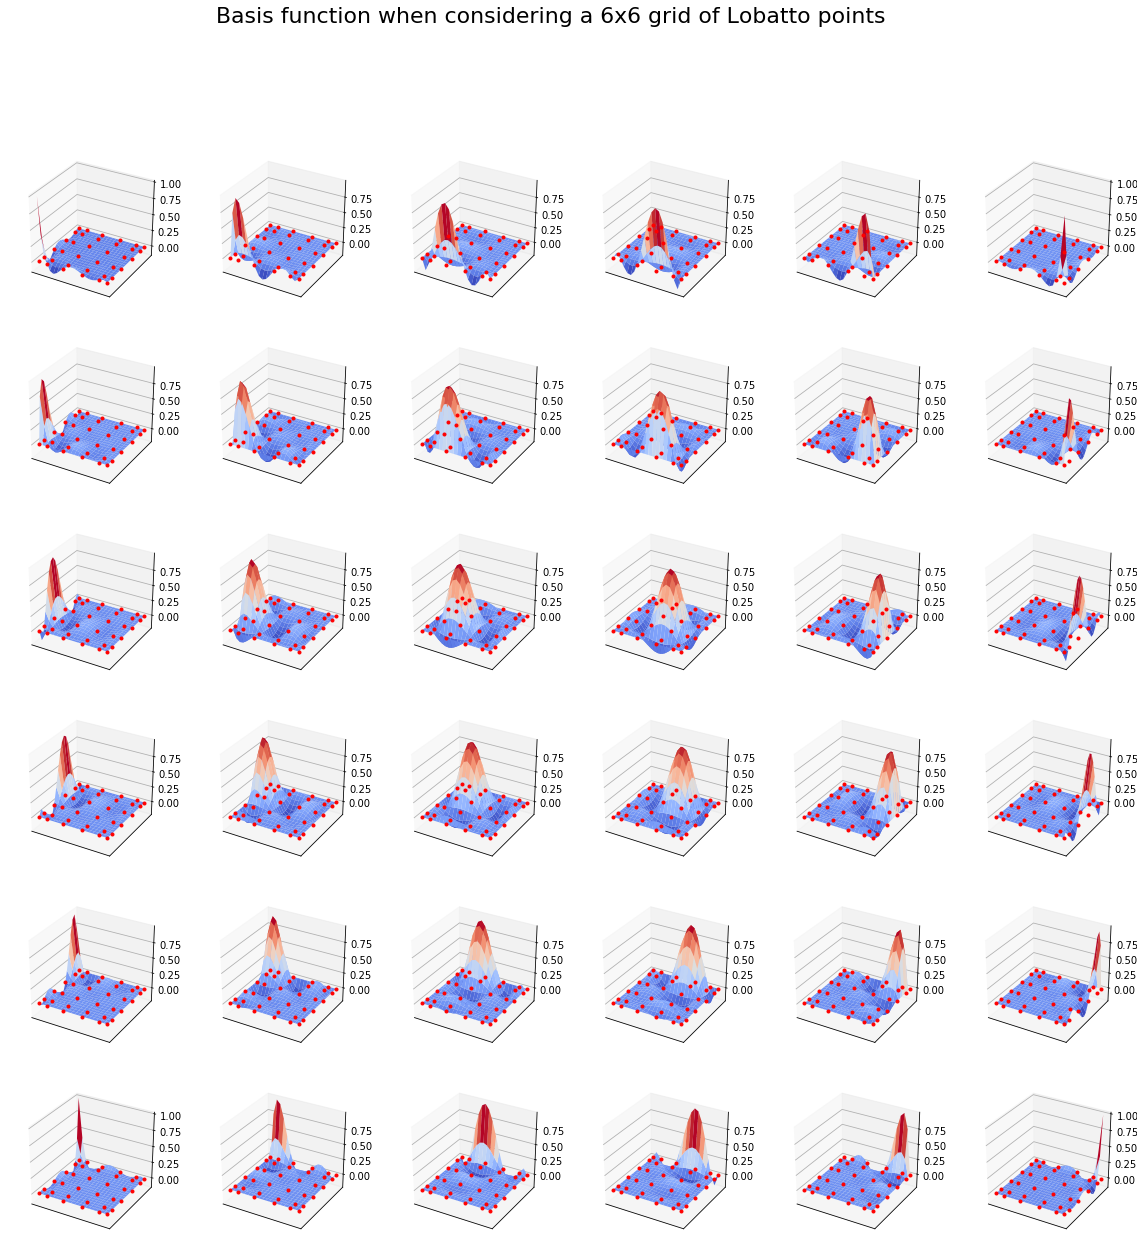

In [5]:
plt.show()

In [6]:
def plot(x_interp, y_interp, f, x_sample, y_sample, title, ax):
    Nx,Ny,nx,ny = x_sample.size,y_sample.size,x_interp.size,y_interp.size
    ax.plot(x_interp, y_interp, 'rX', label="Interpolation Nodes")
    c = ax.contourf(x_sample,y_sample,f_sample, 10, label=r"$f^N(x)$")#;ax.colorbar()
    ax.set_title(title, fontsize=20)
    return c

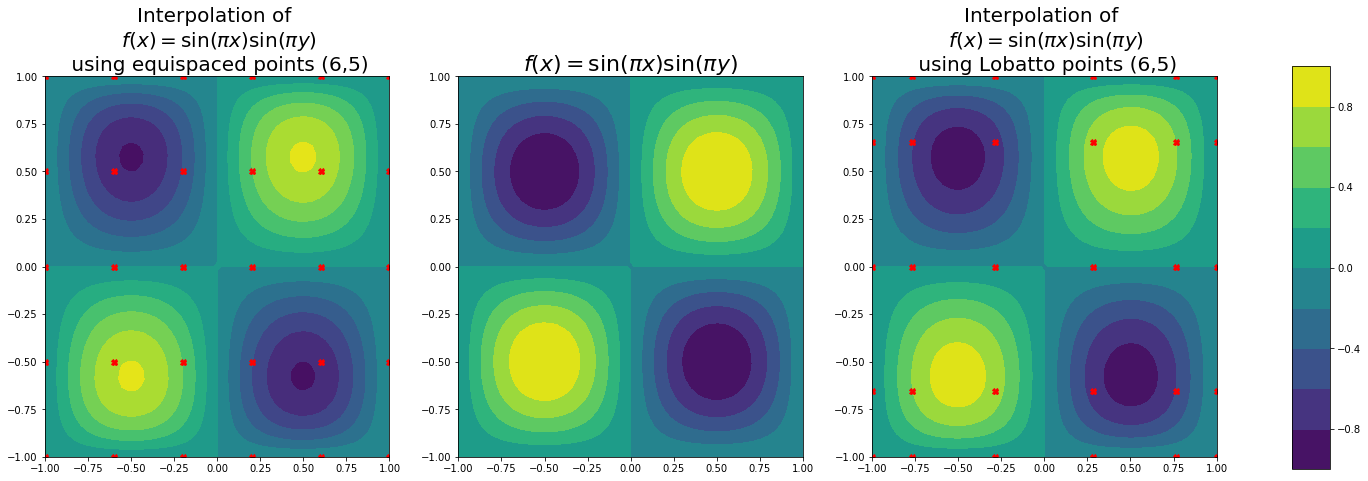

In [7]:
fig, axs = plt.subplots(1,3, figsize=(21,7))

def f(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)


########################################################################################################
x_interp = np.linspace(-1,1,6)
y_interp = np.linspace(-1,1,5)
x_sample = np.linspace(-1,1,50)
y_sample = np.linspace(-1,1,50)
Nx,Ny,nx,ny = x_sample.size,y_sample.size,x_interp.size,y_interp.size

m = interpolation.compute_2Dmatrix(x_interp,y_interp,x_sample,y_sample)
x_sample,y_sample = np.meshgrid(x_sample,y_sample)
x_interp,y_interp = np.meshgrid(x_interp,y_interp)

f_interp = f(x_interp, y_interp)
f_sample = m.dot(np.reshape(f_interp,[-1])).reshape([Ny,Nx])

c = plot(x_interp, y_interp, f, x_sample, y_sample,
         "Interpolation of \n $f(x) = \sin{(\pi x)} \sin{(\pi y)}$ \n using equispaced points (6,5)", axs[0])

########################################################################################################

x_interp,_ = lobatto.compute_nodes(6)
y_interp,_ = lobatto.compute_nodes(5)
x_sample = np.linspace(-1,1,50)
y_sample = np.linspace(-1,1,50)
Nx,Ny,nx,ny = x_sample.size,y_sample.size,x_interp.size,y_interp.size

m = interpolation.compute_2Dmatrix(x_interp,y_interp,x_sample,y_sample)
x_sample,y_sample = np.meshgrid(x_sample,y_sample)
x_interp,y_interp = np.meshgrid(x_interp,y_interp)

f_interp = f(x_interp, y_interp)
f_sample = m.dot(np.reshape(f_interp,[-1])).reshape([Ny,Nx])

c = plot(x_interp, y_interp, f, x_sample, y_sample,
         "Interpolation of \n $f(x) = \sin{(\pi x)} \sin{(\pi y)}$ \n using Lobatto points (6,5)", axs[2])

########################################################################################################
axs[1].contourf(x_sample,y_sample,f(x_sample,y_sample), 10, label=r"$f(x)$")
axs[1].set_title("$f(x) = \sin{(\pi x)} \sin{(\pi y)}$", fontsize=22)
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.10, 0.025, 0.8])
fig.colorbar(c, cax=cbar_ax)

plt.show()

## Differentiation

### 1D

Differentiation an interpolated function is extremely simple.
$$f^{'N}(x) = \sum_{i=0}^{N}L_i^{'N}(x)f(x_i)$$

### 2D

Derivatives in 2D work the same way as in 1D

$$\frac{\partial f^{MN}(x,y)}{\partial x} = \sum_{i=0}^{N} \sum_{j=0}^{M} L_i^{'N}(x_i) * L_j^{M}(y_j) f(x_i,y_j)$$
$$\frac{\partial f^{MN}(x,y)}{\partial y} = \sum_{i=0}^{N} \sum_{j=0}^{M} L_i^{N}(x_i) * L_j^{'M}(y_j) f(x_i,y_j)$$

## Integration

We integrate our functions using gaussian quadrature technique. The integral is converted into a summation over a fixed number of points.

$$\int f(x) dx = \sum w(i)f(x_i)$$

The points that are used for the quadrature can be optimised to give higher accuracy. For instance, choosing the Gauss-Legendre points would let you integrate perfectly over a polynomial of order $2N-1$ where $N$ is the number of points used in the quadrature. Gauss-Lobatto points integrate perfectly over a polynomial of order $2N-3$, but have the added advantage of having the edge points as nodes.

When using the galerkin method, we will be chosing certain nodes to interpolate a function. The values of the function at these points will thus be trivially known. It thus makes sense to choose the interpolating nodes to be the same as the nodes used for integration. We thus use the Lobatto points for both, interpolation and integration. We need to accurately now the values of a function at boundaries because this will be used heavily when calculating fluxes. Moreover, as seen above, the basis functions behave well when lobatto points are chosen instead of equispaced points.

# Introduction to Galerkin methods

The core idea of galerkin methods is to take the inner product of the known function space with the governing equation. We thus project the governing equation on our function space. For simplicity consider a just one "element". The function space we use will be the space defined the basis functions $L^{NM}_{ij}(x,y)$. This essentially means that our function space is all functions of the for $f(x)g(y)$ where $f$ and $g$ is an order $N$ and $M$ polynomials respectively.
Let our governing equation be $$\frac{\partial q}{\partial t} = f(q)$$

Inner product in the function space is defined as $$<f,g> = \int_{\Omega} fg d\Omega$$

Taking the inner proguct of the governing equation with the function space, we get:

$$\int_{\Omega}\Psi \frac{\partial q^N}{\partial t}d\Omega = \int_{\Omega}\Psi f(q) d\Omega$$
where $q^N$ is the discretization of $q$ on out function space. $$q^N = \sum_j \psi_j q_j$$

Now, the above relation has to hold for every basis function $\psi_i$ int the function space.

Thus, $$\int_{\Omega}\psi_i \sum_j \psi_j \frac{\partial q_j^N}{\partial t}d\Omega = \int_{\Omega}\Psi f(q) d\Omega$$

Taking the summation out of the integral and taking $\frac{\partial q_j^N}{\partial t}$ out,
$$ \sum_j (\int_{\Omega}\psi_i \psi_j d\Omega) \frac{\partial q_j^N}{\partial t} = \int_{\Omega}\Psi f(q) d\Omega$$

This can be reduced to the following expression
$$M \frac{\partial q_j^N}{\partial t} = RHS$$

where M, the "Mass matrix" is defined as
$$M_{ij} = \int_{\Omega}\psi_i \psi_j d\Omega$$

The integral is calculated using the Quadrature method discussed above. If the interpolating nodes were used as the integration nodes, it would result in an inexact integration since if the number of points is $N$ and the order of the polynomial is $2(N-1)$. Higher order lobatto nodes can be calculated for exact integration. Inexact integration leads to the mass matrix being diagonal (easy to check). This reduces the cost of inverting it. However, this computation has to be done just once for the entire simulation.

The treatment of the RHS depends on what term it is

## Continuous vs. Discontinuous methods

If we are to have a multi-cell system, we can go about it two ways:

### Continuous Galerkin

In CG methods, the common boundary of neighboring cells is shared. This essentially means that all our stored variables will be continuous functions. Our function-space will be a continuous function that is a collection of polynomials in every cell.

The problem with this method is that the final matrix vector problem we get will be coupled. This is because the common boundary will occur in the equation of two different cells. Thus, to solve this system, we will need to construct giant matrices for the entire system. We'll have to carry out matrix-vector computations with these large matrices every timestep

### Discontinuous Galerkin

An alternative to that is the DG method. The boundaries of each cell are independant of the neighbours. This allows us to do our computations for each cell independently. Information flows between cells because of the flux term (which will be shown in the later formulation). This term, which would have gone zero everywhere but the system boundary for CG is now non zero at the edges of the DG cell. The boundaries of the neighbors will be used when computing the flux term.

One huge advantage of DG methods is the ability to run in parallel. The method scales up beautifully with increasing number of computing nodes. Every node can be assigned a set of elements that it has to bother about. Internode communication will be limited to exchanging the boundary values. Every node can then just perform the matrix-vector computations on its own set of cells

## Difussion

Governing equation:
$\frac{\partial T}{\partial t} = \alpha \nabla^2 T$

We break this into two equations:
$$\Theta = \nabla T \\
\frac{\partial T}{\partial t} = \alpha \nabla \cdot \Theta$$

We first solve for $\Theta$
$$ \theta_x = \frac{\partial T}{\partial x} \\ \theta_y = \frac{\partial T}{\partial y}$$

Proceeding as earlier,
\begin{align}
 M\Theta^N &= \int_{\Omega}\Psi \nabla T d\Omega \\
 M_i\Theta^N &= \int_{\Omega}\psi_i \nabla  (\sum_j \psi_j T_j) d\Omega \\
 M_i\Theta^N &=  \sum_j \int_{\Omega}\nabla(\psi_j \psi_i) T_j d\Omega - \sum_j \int_{\Omega}\nabla( \psi_i )\psi_j T_j d\Omega\\
 M_i\Theta^N &= \sum_j ([\psi_i \psi_j]_{\Gamma} T_j - \int_{\Omega}\psi_j\nabla\psi_i T_j d\Omega)\\
\end{align}

The first term will be evaluated at the boundaries. This can be rewritten as matrix vector equation:

$$M\Theta^N = FT - DT$$

Where F and T are the flux and derivative matrices respectively. F is 0 for points not corresponding to the boundary.
$$F_{ij} = [\psi_i \psi_j]_{\Gamma}$$
$$D_{ij} = \psi_j\nabla\psi_i$$

Solving the second part:

\begin{align}
\frac{\partial T}{\partial t} &= \alpha \nabla \cdot \Theta\\
\int_\Omega \Psi \frac{\partial T}{\partial t} d\Omega &= \alpha \int_\Omega \Psi \nabla \cdot \Theta d\Omega\\
M_i\frac{\partial T_j}{\partial t} &= \sum_j ([\psi_i \psi_j]_{\Gamma} \Theta_j - \int_{\Omega}\psi_j\nabla\psi_i T_j d\Omega)\\
\end{align}

In [2]:
import system
import convectiveSolver
import numpy as np
import matplotlib.pyplot as plt
from utilities import *

def one(args, factor=1.0):
    x,y = args["x"], args["y"]
    return factor*np.ones_like(x);

def zero(args):
    x,y = args["x"], args["y"]
    return np.zeros_like(x)

def sin_y(args, factor=1.0):
    x,y = args["x"], args["y"]
    return factor*np.sin(np.pi*y);

boundary_u = {'N':{'type':'dirichlet','val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet','val':zero, 'args':["x","y"]},
              'W':{'type':'dirichlet','val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet','val':zero, 'args':["x","y"]}}

boundary_v = {'N':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'W':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}}

boundary_T = {'N':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet' ,'val':sin_y,  'args':["x","y"]},
              'W':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}}
boundaries = {'u':boundary_u,
              'v':boundary_v,
              'T':boundary_T,}
init = {'u':{'val':zero,'args':["x","y"]},
        'v':{'val':zero,'args':["x","y"]},
        'T':{'val':zero,'args':["x","y"]}}

### Example: Temperature distrigution on a 2D conducting plate with dirichlet boundaries

The right wall is maintained at $T = 1$ and all the other walls are maintained at $T = 0$. The thermal conductivity ($\alpha$) is set at 0.1. The time step for all of the simulations is 0.1ms and the time horizon is 2sec. The solution is compared to the 2D steady state temperature distribution that can be computed analytically. The order in X and Y is varied and the errors are plotted. The first set of plots are generated using inexact integration and the second set using exact. You can see that the difference in errors is fairly small.

Note: This is a spectral method. There is only one cell.

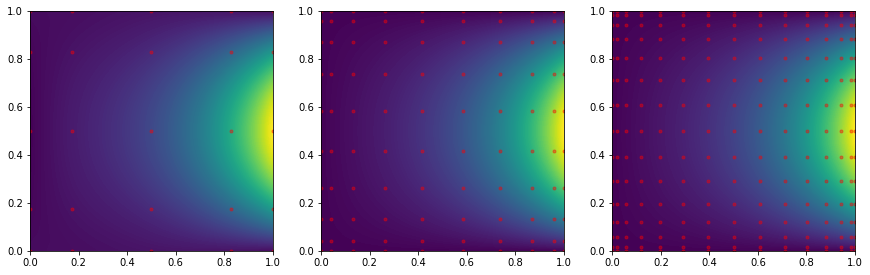

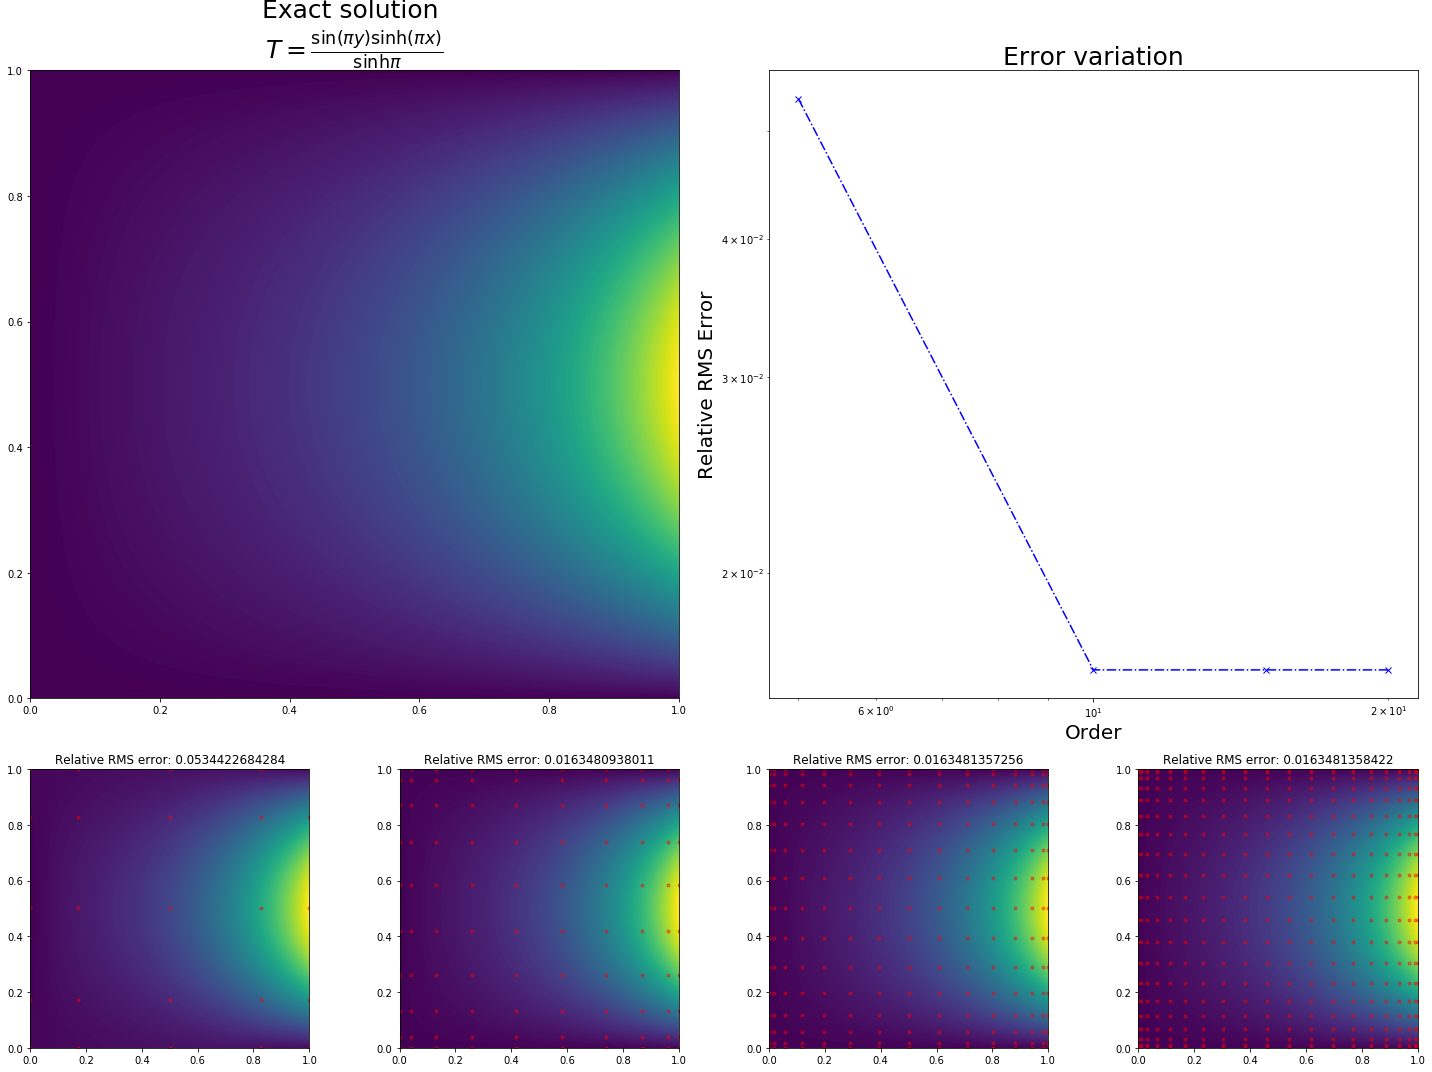

In [21]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 4)

order = [5,10,15,20]
errors = []
gs = gridspec.GridSpec(3, 4)
fig = plt.figure(figsize=(20,15))
    
for i, numpoints in enumerate(order):
    s = convectiveSolver.convectiveSolver(init=init, boundaries=boundaries, mx=numpoints, my=numpoints, nx=1, ny=1,xmin=0.0,ymin=0.0, alpha=0.1, exact=False)
    s.solve(dt=1e-4, Th=2e0)
    sys = s.system
    sys.computeSample('T')
    x   = sys.properties["x_sample"]
    y   = sys.properties["y_sample"]
    T   = sys.properties["T_sample"]
    T_exact = np.sin(np.pi*y)*np.sinh(np.pi*x)/np.sinh(np.pi)

    errors.append(np.sqrt(np.mean((T - T_exact)**2))/np.mean(T))
    
    ax = fig.add_subplot(gs[2,i])
    ax.contourf(x,y,T,200);
    xs   = sys.properties["x"]
    ys   = sys.properties["y"]
    ax.plot(xs,ys,'r.', alpha=0.4)
    ax.set_title("Relative RMS error: "+str(errors[-1]))

ax = fig.add_subplot(gs[:2,0:2])
ax.set_title("Exact solution \n"+r'$T=\frac{\sin{(\pi y)}\sinh{(\pi x)}}{\sinh{\pi}}$', fontsize=25)
ax.contourf(x,y,T_exact,200);

ax = fig.add_subplot(gs[:2,2:])
ax.set_title("Error variation",fontsize=25)
ax.loglog(order, errors,'b-.x');
ax.set_xlabel("Order", fontsize=20)
ax.set_ylabel("Relative RMS Error", fontsize=20)

plt.tight_layout();
plt.show();

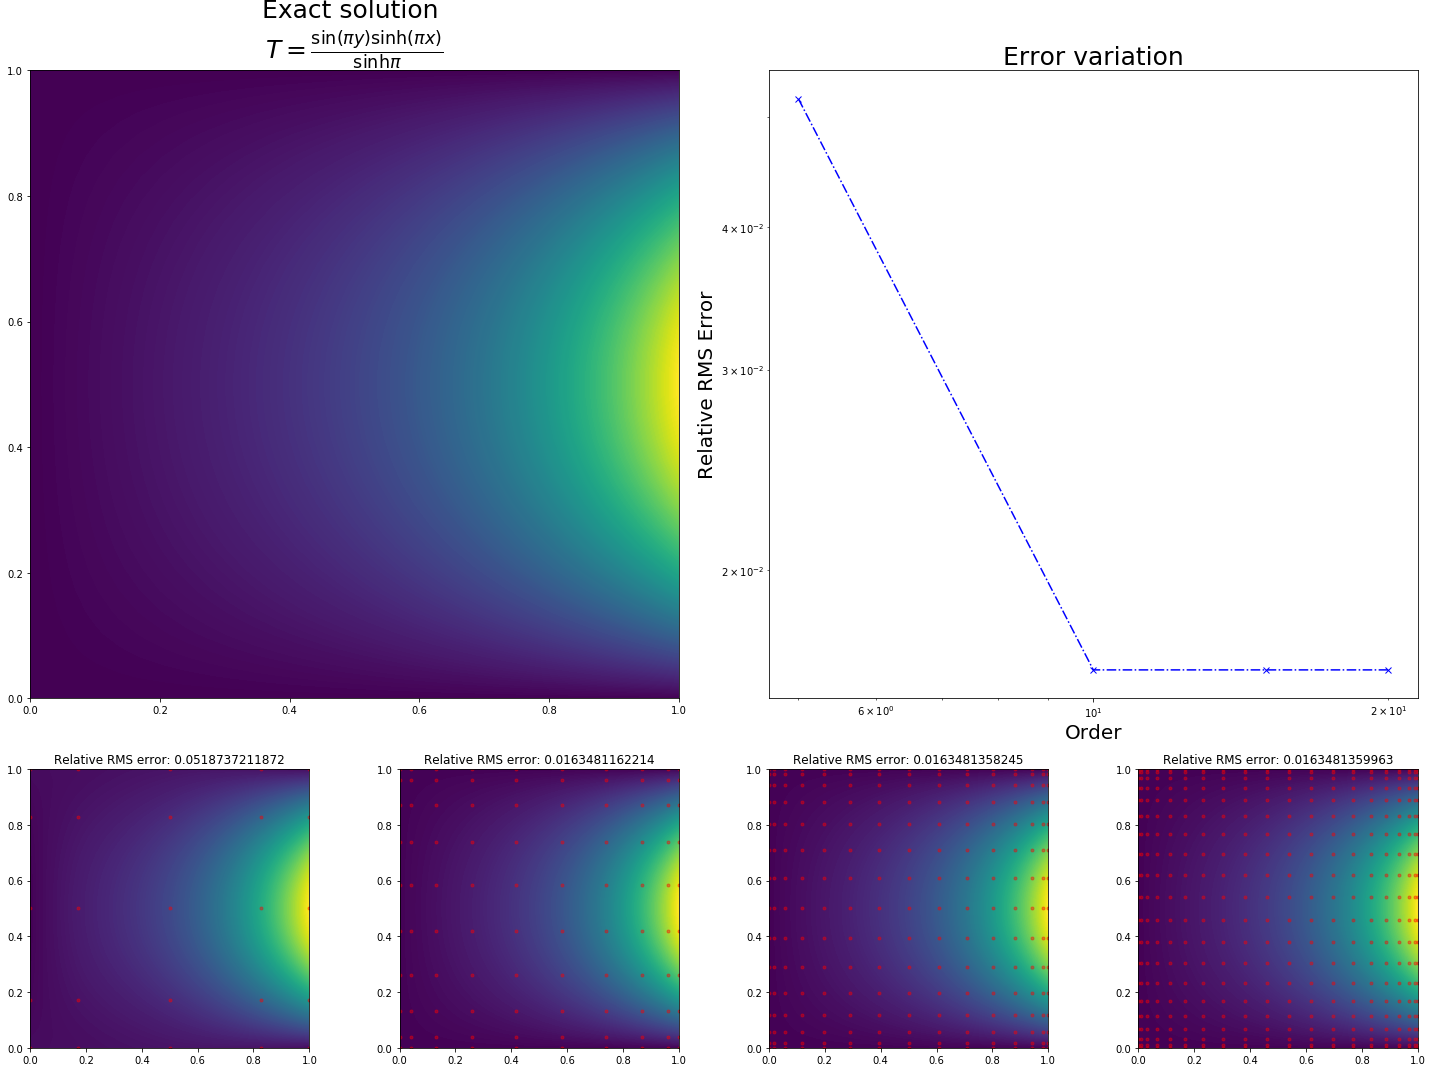

In [93]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 4)

order = [5,10,15,20]
errors = []
gs = gridspec.GridSpec(3, 4)
fig = plt.figure(figsize=(20,15))
    
for i, numpoints in enumerate(order):
    s = convectiveSolver.convectiveSolver(init=init, boundaries=boundaries, mx=numpoints, my=numpoints, nx=1, ny=1,xmin=0.0,ymin=0.0, alpha=0.1, exact=True)
    s.solve(dt=1e-4, Th=2e0)
    sys = s.system
    sys.computeSample('T')
    x   = sys.properties["x_sample"]
    y   = sys.properties["y_sample"]
    T   = sys.properties["T_sample"]
    T_exact = np.sin(np.pi*y)*np.sinh(np.pi*x)/np.sinh(np.pi)

    errors.append(np.sqrt(np.mean((T - T_exact)**2))/np.mean(T))
    
    ax = fig.add_subplot(gs[2,i])
    ax.contourf(x,y,T,200);
    xs   = sys.properties["x"]
    ys   = sys.properties["y"]
    ax.plot(xs,ys,'r.', alpha=0.4)
    ax.set_title("Relative RMS error: "+str(errors[-1]))

ax = fig.add_subplot(gs[:2,0:2])
ax.set_title("Exact solution \n"+r'$T=\frac{\sin{(\pi y)}\sinh{(\pi x)}}{\sinh{\pi}}$', fontsize=25)
ax.contourf(x,y,T_exact,200);

ax = fig.add_subplot(gs[:2,2:])
ax.set_title("Error variation",fontsize=25)
ax.loglog(order, errors,'b-.x');
ax.set_xlabel("Order", fontsize=20)
ax.set_ylabel("Relative RMS Error", fontsize=20)

plt.tight_layout();
plt.show();

Breaking up the domain into multiple cells is beneficial since it reduces the size of the matrices/increases the number of sampling points. However, higher number of cells also means that you'll have to repeat the matrix vector operations that many times.

If we were to use a zeroeth order scheme, it would essentially be like a finite volume scheme where every cell has a single value.

We will now run the same exaple but will vary the number of elements too keeping the total number of nodes constant to observe how the error varies. We will just be using inexact integration for this one.

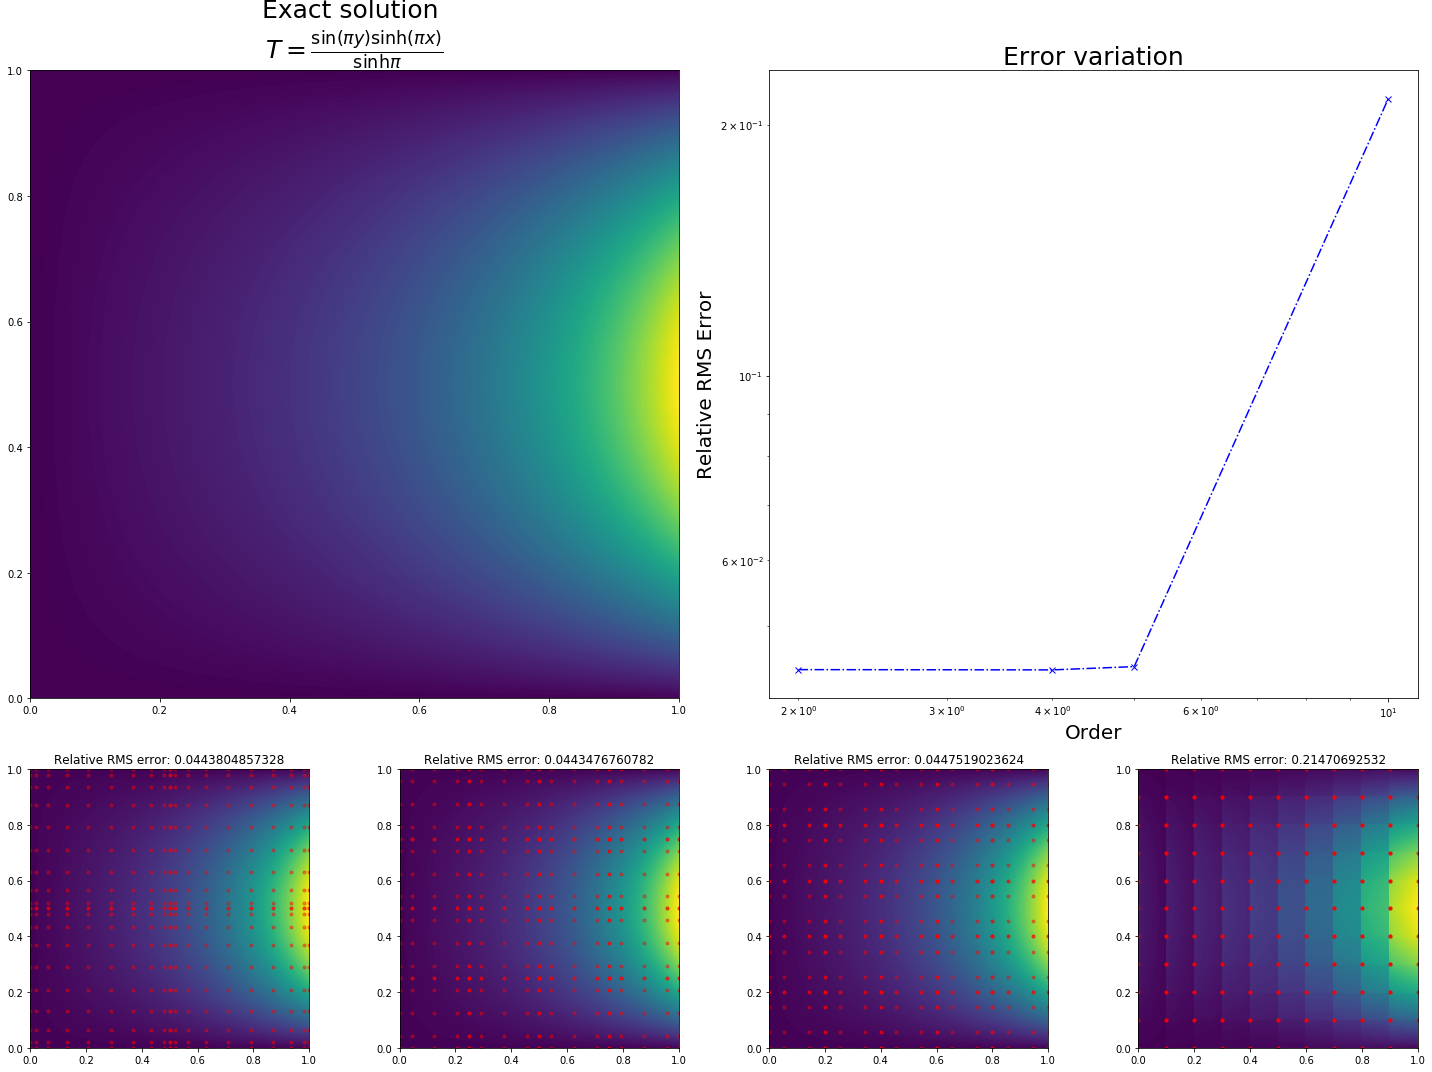

In [10]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 4)

elems = [2,4,5,10]
errors = []
gs = gridspec.GridSpec(3, 4)
fig = plt.figure(figsize=(20,15))
    
for i, numelems in enumerate(elems):
    s = convectiveSolver.convectiveSolver(init=init, boundaries=boundaries, mx=20/numelems, my=20/numelems, nx=numelems, 
                                          ny=numelems,xmin=0.0,ymin=0.0, alpha=0.1, exact=True,
                                          sample_x=40/numelems, sample_y=40/numelems)
    s.solve(dt=5e-5, Th=1.5)
    sys = s.system
    sys.computeSample('T')
    x   = sys.properties["x_sample"]
    y   = sys.properties["y_sample"]
    T   = sys.properties["T_sample"]
    T_exact = np.sin(np.pi*y)*np.sinh(np.pi*x)/np.sinh(np.pi)

    errors.append(np.sqrt(np.mean((T - T_exact)**2))/np.mean(T_exact))
    
    ax = fig.add_subplot(gs[2,i])
    ax.contourf(x,y,T,200);
    xs   = sys.properties["x"]
    ys   = sys.properties["y"]
    ax.plot(xs,ys,'r.', alpha=0.4)
    ax.set_title("Relative RMS error: "+str(errors[-1]))

ax = fig.add_subplot(gs[:2,0:2])
ax.set_title("Exact solution \n"+r'$T=\frac{\sin{(\pi y)}\sinh{(\pi x)}}{\sinh{\pi}}$', fontsize=25)
ax.contourf(x,y,T_exact,200);

ax = fig.add_subplot(gs[:2,2:])
ax.set_title("Error variation",fontsize=25)
ax.loglog(elems, errors,'b-.x');
ax.set_xlabel("Order", fontsize=20)
ax.set_ylabel("Relative RMS Error", fontsize=20)

plt.tight_layout();
plt.show();

### Example: Diffusion of a Gaussian Temperature distribution

A spectral method works poorly for this problem, perhaps because of very low sampling provided by the lobatto points near the center. Note that the lower accuracy near the borders is due to the inaccurate boundary conditions. The analytical solution is for the boundaries being infinitely far away from the gaussian Temperature distribution

In [68]:
def gaussian(args):
    x,y = args["x"], args["y"]
    return (1/(0.1))*np.exp(-(x**2+y**2)/(0.4*0.1))

boundary_u = {'N':{'type':'dirichlet','val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet','val':zero, 'args':["x","y"]},
              'W':{'type':'dirichlet','val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet','val':zero, 'args':["x","y"]}}

boundary_v = {'N':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'W':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}}

boundary_T = {'N':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'E':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]},
              'W':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}, 
              'S':{'type':'dirichlet' ,'val':zero, 'args':["x","y"]}}
boundaries = {'u':boundary_u,
              'v':boundary_v,
              'T':boundary_T,}
init = {'u':{'val':zero,    'args':["x","y"]},
        'v':{'val':zero,    'args':["x","y"]},
        'T':{'val':gaussian,'args':["x","y"]}}

In [71]:
s = convectiveSolver.convectiveSolver(init=init, boundaries=boundaries, mx=10, my=10, nx=5, ny=5, alpha=0.1, exact=True)
s.solve(dt=1e-4, Th=0.2)

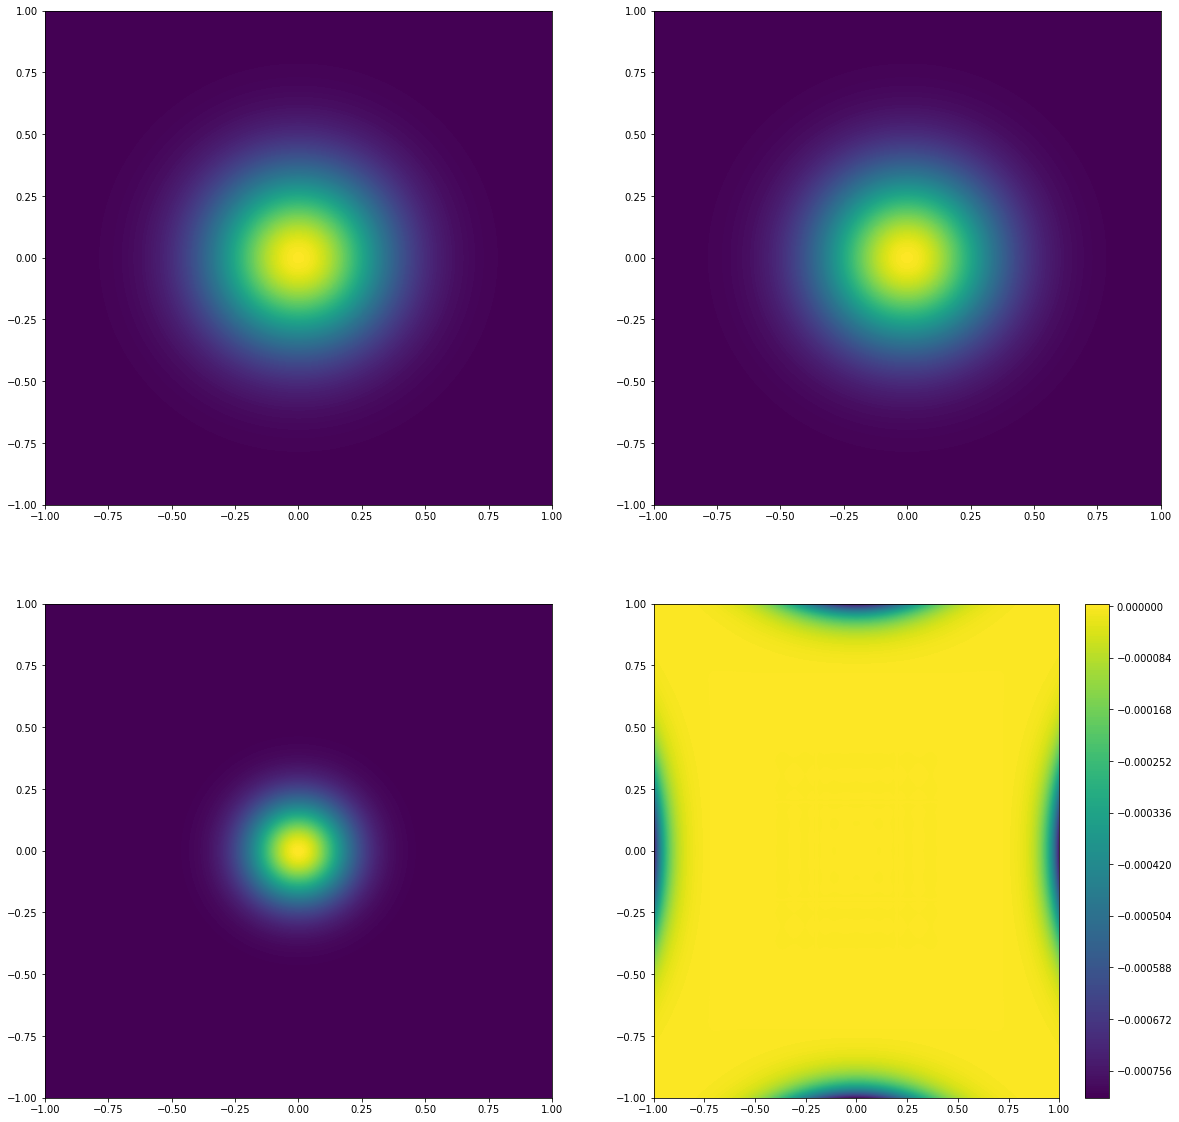

In [72]:
def exact(x,y,t):
    return (1/(0.1+t))*np.exp(-(x**2+y**2)/(0.4*(0.1+t)))

sys = s.system
sys.computeSample('T')
x   = sys.properties["x_sample"]
y   = sys.properties["y_sample"]
T   = sys.properties["T_sample"]
T_exact = exact(x,y,0.2)
T_init = exact(x,y,0)
fig, axs = plt.subplots(2,2,figsize=(20,20))
axs[0][0].contourf(x,y,T,200);
axs[0][1].contourf(x,y,T_exact,200);
axs[1][0].contourf(x,y,T_init,200);
c = axs[1][1].contourf(x,y,(T-T_exact),200)
plt.colorbar(c)
plt.show()